<a href="https://colab.research.google.com/github/dnbrk13/danasrepo/blob/main/capstone_project_outpeer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЗАДАЧА ПРОГРАММИРОВАНИЯ #1: ИМПОРТ БИБЛИОТЕК/НАБОРОВ ДАННЫХ И ВЫПОЛНЕНИЕ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА ДАННЫХ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [2]:
# чтение CSV file
telecom_df = pd.read_csv("telecom_churn.csv")

In [3]:
# Загрузка 5 первых экземпляров
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
# Загрузка нижние 5 экземпляров
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [5]:
# Проверка формы кадра данных
telecom_df.shape

(5000, 21)

In [6]:
# Отображение название столбцов
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [7]:
# Получение сводки по типам данных
telecom_df.dtypes

,0
state,int64
account_length,int64
area_code,int64
phone_number,int64
international_plan,int64
voice_mail_plan,int64
number_vmail_messages,int64
total_day_minutes,float64
total_day_calls,int64
total_day_charge,float64


ВЫПОЛНЕНИЕ ВИЗУАЛИЗАЦИИ ДАННЫХ

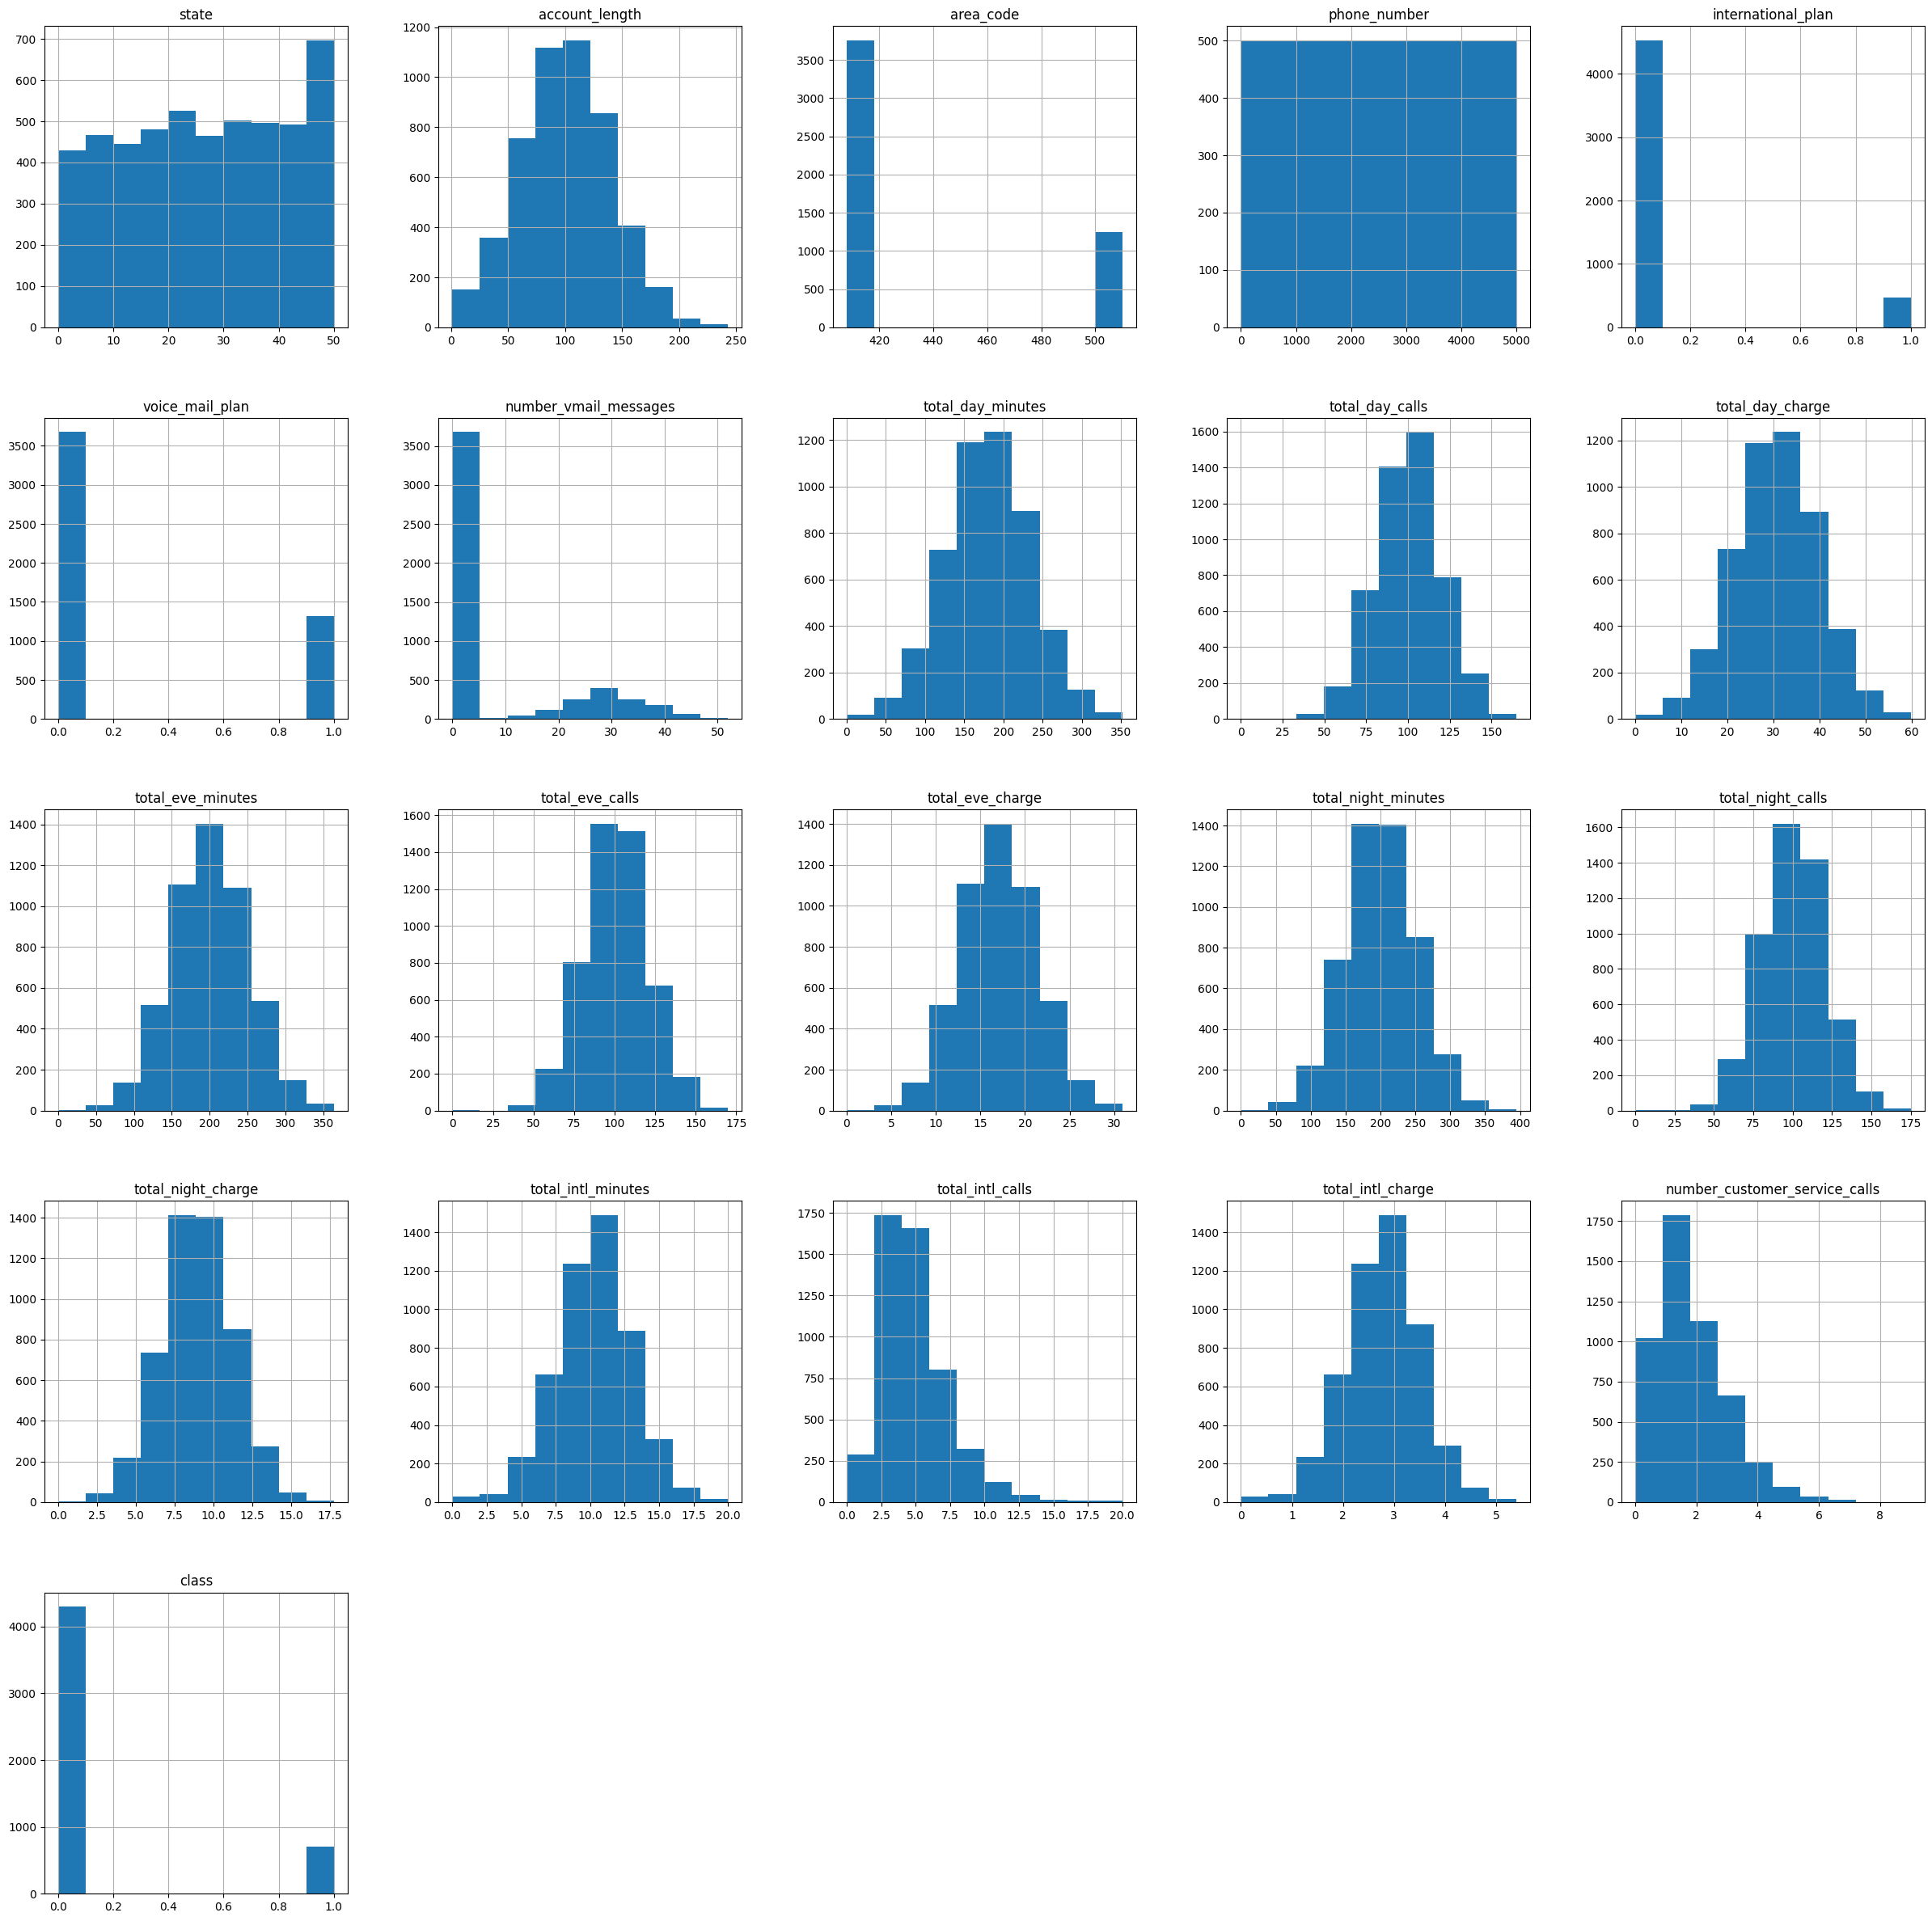

In [8]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [9]:
telecom_df["class"].value_counts()

,count
class,
0,4293
1,707


<Axes: ylabel='count'>

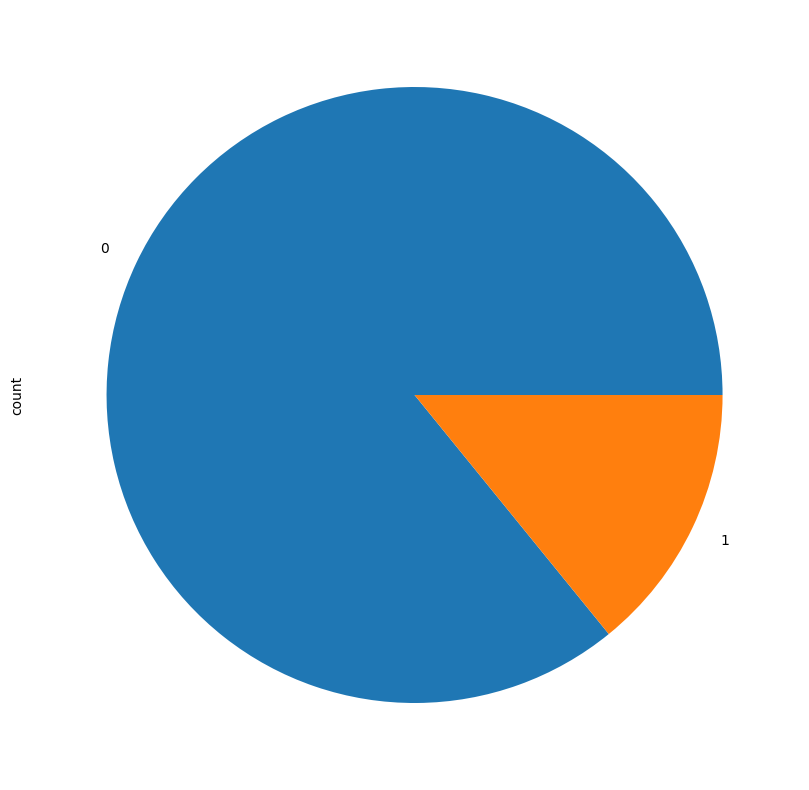

In [10]:
plt.figure(figsize = [10, 10])
telecom_df["class"].value_counts().plot(kind='pie')

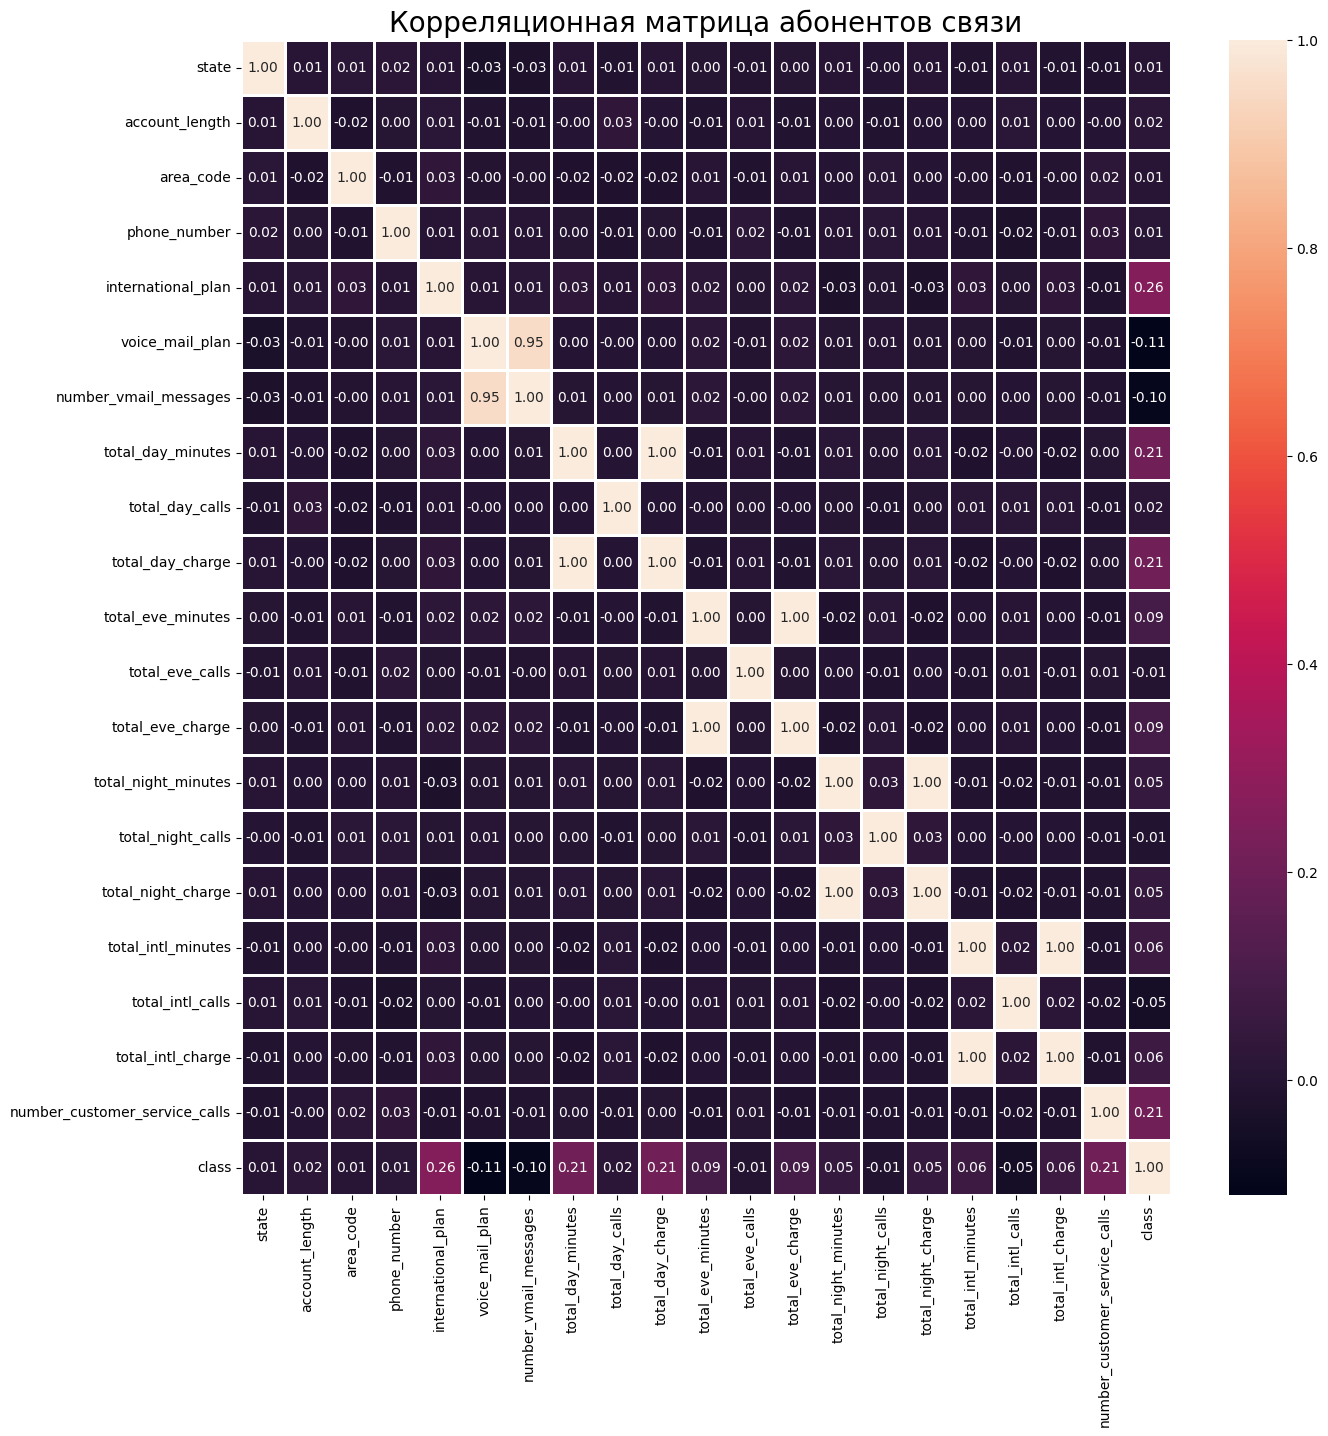

In [11]:
# Корреляционная матрица
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Корреляционная матрица абонентов связи", fontsize = 20)
plt.show()

# "voice_mail_plan" и "number_vmail_messages" сильно коррелируют.
#  «общий дневной заряд» и «общее количество ежедневных минут» сильно коррелируют.

<ipython-input-12-e418a58f5412>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
<ipython-input-12-e418a58f5412>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],


Text(0.5, 1.0, 'Распределение дневных расходов по оттоку')

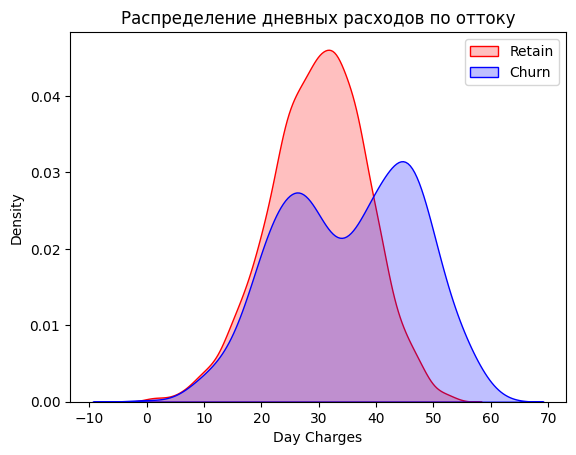

In [12]:
# Плата за отток по дням
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Распределение дневных расходов по оттоку")

ОПРЕДЕЛЕНИЕ ВАЖНОСТИ ПРИЗНАКОВ И ПОДГОТОВКА ДАННЫХ ПЕРЕД ОБУЧЕНИЕМ МОДЕЛИ

In [13]:
# Ненужные функции снизят скорость обучения, интерпретируемость модели и производительность обобщения на тестовых данных.
# Поэтому поиск и выбор наиболее полезных функций в наборе данных имеет решающее значение.
# Присвоение входных характеристик X и выходных (Churn) y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [14]:
X.shape

(5000, 18)

In [15]:
y.shape

(5000,)

In [16]:
# Выполнение тренировочного сплита
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [17]:
X_train.shape

(3500, 18)

In [18]:
X_test.shape

(1500, 18)

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

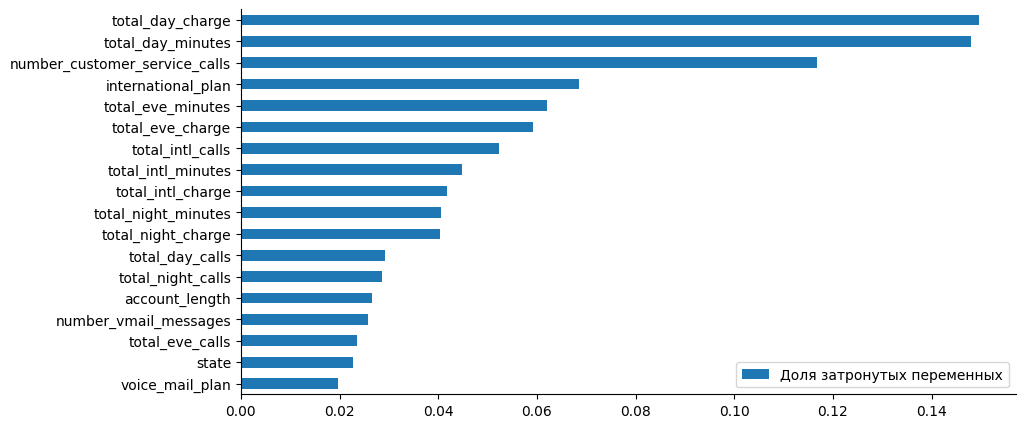

In [20]:
# Построение графика важности функции

feat_scores= pd.DataFrame({"Доля затронутых переменных" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Доля затронутых переменных")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [21]:
# Приведенный выше график сгенерирован алгоритмом Random Forest
# График показывает, что «total_day_minutes» возглавляет список важных функций, за ним следует «total_day_minutes» и так далее.

ОБУЧЕНИЕ И ОЦЕНКА КЛАССИФИКАТОРА ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_predict = model_LR.predict(X_test)

In [25]:
print(classification_report(y_test, y_predict))
# точность - это отношение TP/(TP+FP)
# recall - это отношение TP/(TP+FN)
# F-beta score можно интерпретировать как взвешенное гармоническое среднее точности и полноты
# где оценка F-beta достигает своего лучшего значения в 1 и худшего в 0.


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.41      0.09      0.15       201

    accuracy                           0.86      1500
   macro avg       0.64      0.53      0.54      1500
weighted avg       0.81      0.86      0.82      1500



ОБУЧЕНИЕ И ОЦЕНКА КЛАССИФИКАТОРА МЕТОДА ОПОРНЫХ ВЕКТОРОВ

In [26]:
from sklearn.calibration import CalibratedClassifierCV # Для вывода оценки вероятности
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [27]:
y_predict = model_svm.predict(X_test)

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1299
           1       0.47      0.18      0.27       201

    accuracy                           0.86      1500
   macro avg       0.68      0.58      0.59      1500
weighted avg       0.83      0.86      0.84      1500



<Axes: >

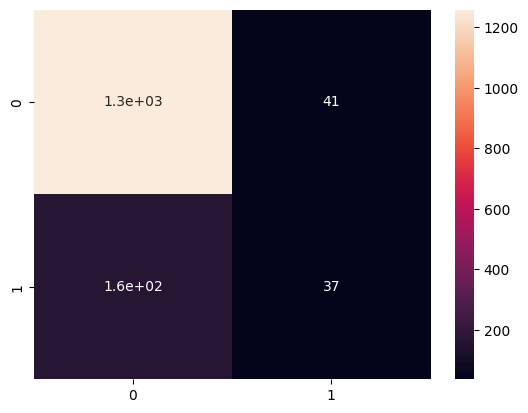

In [29]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

ОБУЧЕНИЕ И ОЦЕНКА СЛУЧАЙНОГО КЛАССИФИКАТОРА RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_predict = model_rf.predict(X_test)

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.93      0.75      0.83       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.96      0.96      0.96      1500



<Axes: >

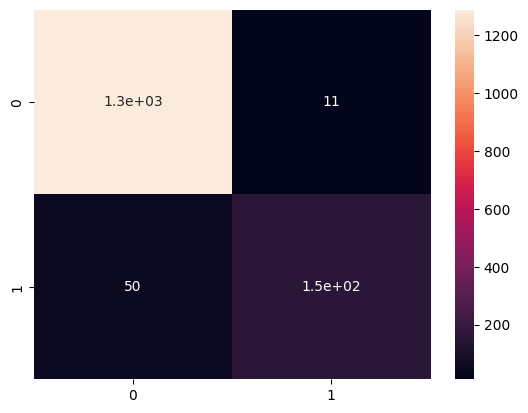

In [33]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

ОБУЧЕНИЕ И ОЦЕНКА KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_predict = model_knn.predict(X_test)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



<Axes: >

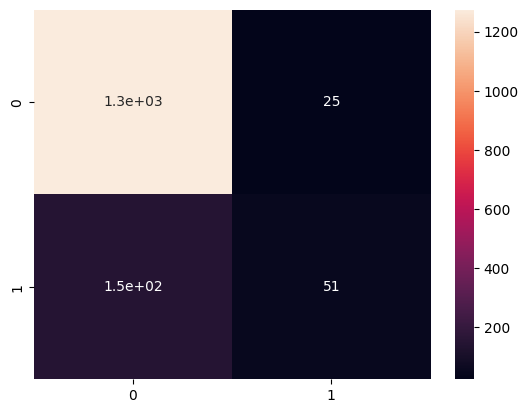

In [37]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

ОБУЧЕНИЕ И ОЦЕНКА naive_bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [40]:
y_predict = model_gnb.predict(X_test)

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



<Axes: >

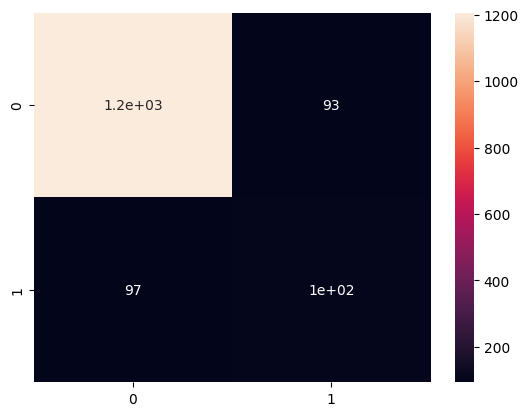

In [42]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

СРАВНЕНИЕ ОБУЧЕННЫХ МОДЕЛЕЙ КЛАССИФИКАТОРОВ И ЗАКЛЮЧИТЕЛЬНЫЕ ЗАМЕЧАНИЯ

In [43]:
model_LR.predict_proba(X_test)
  # Первый элемент - это вероятность того, что выход будет 0
  # Второй элемент - это вероятность того, что выход будет 1

array([[0.9722765 , 0.0277235 ],
       [0.92198648, 0.07801352],
       [0.9039684 , 0.0960316 ],
       ...,
       [0.91890846, 0.08109154],
       [0.94538575, 0.05461425],
       [0.97659437, 0.02340563]])

In [44]:
model_LR.predict_proba(X_test)[:, 1]

array([0.0277235 , 0.07801352, 0.0960316 , ..., 0.08109154, 0.05461425,
       0.02340563])

In [45]:
y_test

,class
4827,0
1793,0
2957,0
4218,0
2188,0
...,...
4230,1
3824,0
262,0
1100,0


In [46]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [47]:
fpr1

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 1.53964588e-03,
       1.53964588e-03, 3.07929176e-03, 3.07929176e-03, 6.15858353e-03,
       6.15858353e-03, 7.69822941e-03, 7.69822941e-03, 8.46805235e-03,
       8.46805235e-03, 1.23171671e-02, 1.23171671e-02, 1.46266359e-02,
       1.46266359e-02, 1.53964588e-02, 1.53964588e-02, 1.69361047e-02,
       1.69361047e-02, 1.84757506e-02, 1.84757506e-02, 1.92455735e-02,
       1.92455735e-02, 2.00153965e-02, 2.00153965e-02, 2.30946882e-02,
       2.30946882e-02, 2.38645112e-02, 2.38645112e-02, 2.46343341e-02,
       2.46343341e-02, 2.54041570e-02, 2.54041570e-02, 2.84834488e-02,
       2.84834488e-02, 3.61816782e-02, 3.61816782e-02, 3.77213241e-02,
       3.77213241e-02, 3.92609700e-02, 3.92609700e-02, 4.08006159e-02,
       4.08006159e-02, 4.15704388e-02, 4.15704388e-02, 4.38799076e-02,
       4.38799076e-02, 4.46497306e-02, 4.46497306e-02, 4.61893764e-02,
       4.61893764e-02, 5.00384911e-02, 5.00384911e-02, 5.15781370e-02,
      

In [48]:
tpr1

array([0.        , 0.        , 0.00497512, 0.00497512, 0.00995025,
       0.00995025, 0.0199005 , 0.0199005 , 0.02487562, 0.02487562,
       0.02985075, 0.02985075, 0.039801  , 0.039801  , 0.04477612,
       0.04477612, 0.04975124, 0.04975124, 0.06965174, 0.06965174,
       0.07960199, 0.07960199, 0.08457711, 0.08457711, 0.08955224,
       0.08955224, 0.09452736, 0.09452736, 0.10447761, 0.10447761,
       0.10945274, 0.10945274, 0.11442786, 0.11442786, 0.11940299,
       0.11940299, 0.12437811, 0.12437811, 0.13432836, 0.13432836,
       0.13930348, 0.13930348, 0.14925373, 0.14925373, 0.16915423,
       0.16915423, 0.17412935, 0.17412935, 0.1840796 , 0.1840796 ,
       0.18905473, 0.18905473, 0.19402985, 0.19402985, 0.2039801 ,
       0.2039801 , 0.21890547, 0.21890547, 0.2238806 , 0.2238806 ,
       0.22885572, 0.22885572, 0.23383085, 0.23383085, 0.23880597,
       0.23880597, 0.25870647, 0.25870647, 0.26865672, 0.26865672,
       0.27363184, 0.27363184, 0.27860697, 0.27860697, 0.28855

In [49]:
thresh1

array([       inf, 0.84605534, 0.83201099, 0.80665569, 0.76201885,
       0.75456347, 0.73552334, 0.69640683, 0.69262389, 0.66568499,
       0.6544942 , 0.65365201, 0.63482767, 0.58116882, 0.5793052 ,
       0.55943329, 0.54441938, 0.54428941, 0.52853369, 0.5208599 ,
       0.5155869 , 0.51438083, 0.51084787, 0.51073919, 0.50472809,
       0.50222962, 0.49776855, 0.48567524, 0.48121913, 0.4803487 ,
       0.47836522, 0.47401287, 0.47208647, 0.46688455, 0.45688752,
       0.45222401, 0.45208721, 0.43137566, 0.418429  , 0.41601112,
       0.41566152, 0.41469253, 0.41430502, 0.40905606, 0.40420555,
       0.40180436, 0.40125009, 0.39678808, 0.39368709, 0.3933825 ,
       0.38715296, 0.3838126 , 0.38349028, 0.37539511, 0.37327488,
       0.37070246, 0.36719812, 0.3551578 , 0.35514392, 0.3545999 ,
       0.35453089, 0.35130635, 0.35078584, 0.3478903 , 0.34788539,
       0.33791956, 0.33633652, 0.33627218, 0.33570185, 0.33194024,
       0.33057072, 0.32046362, 0.31994159, 0.31736885, 0.31547

In [50]:
# кривая ROC
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [51]:
# оценка AUC

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Логистическая регрессия
print("Support Vector Machine: ", auc_score2) # Метод опорных векторов
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6991485988073489
Support Vector Machine:  0.7988310947188615
Random Forest:  0.9069375983822228
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


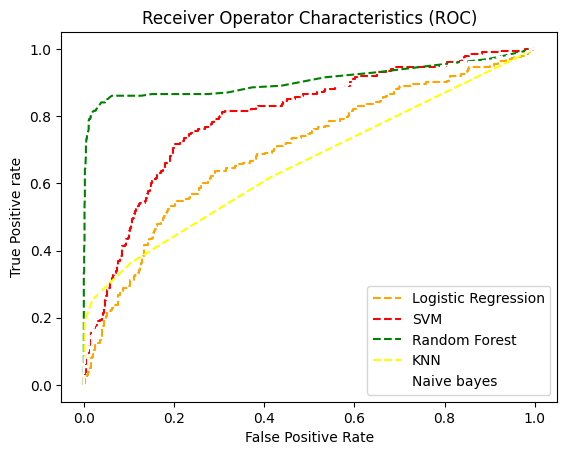

In [52]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

График показывает, что алгоритм Random Forest показал наилучшую AUC. Таким образом, очевидно, что модель Random Forest лучше справляется с классификацией отточенных/удержанных клиентов телекоммуникационных услуг.

In [53]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.93      0.75      0.83       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.96      0.96      0.96      1500



Среди всех обученных моделей алгоритм Random Forest Classifier показал самую высокую площадь под кривой ROC (AUC).

Следующие оценки являются результатами модели классификатора Random Forest

Точность: ~96% точность этикетки
Точность: ~96% помечено как «Удержанные клиенты» и ~94% помечено как «Ушедшие клиенты»
Отзыв: ~99% помечены как «Удержанные клиенты» и ~76% помечены как «Ушедшие клиенты»




Этот набор данных содержит информацию о просроченных платежах, демографических факторах, кредитных данных, истории платежей и выписках по счетам клиентов кредитных карт на Тайване с апреля 2005 года по сентябрь 2005 года.


Все 25 переменных:

- ID: ID каждого клиента
- LIMIT_BAL: Сумма предоставленного кредита в NT долларах (включая индивидуальный и семейный/дополнительный кредит)
- SEX: пол (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Семейное положение (1=married, 2=single, 3=others)
- AGE: Возраст в годах
- PAY_0: Статус погашения по состоянию на сентябрь 2005 года (-1=оплата в срок, 1=задержка платежа на один месяц, 2=задержка платежа на два месяца, ... 8=задержка платежа на восемь месяцев, 9=отсрочка платежа на девять месяцев и более)

- PAY_2: Статус погашения по состоянию на август 2005 года (масштаб аналогичен выше)
- PAY_3: RСтатус погашения по состоянию на июль 2005 года (шкала аналогична вышеуказанной)
- PAY_4: Статус погашения по состоянию на июнь 2005 года (масштаб аналогичен выше)
- PAY_5: Статус погашения по состоянию на май 2005 года (масштаб аналогичен выше)
- PAY_6: Статус погашения по состоянию на апрель 2005 года (шкала аналогична вышеуказанной)
- BILL_AMT1: Сумма выписки по счету в сентябре 2005 года (NT доллары)
- BILL_AMT2: Сумма выписки по счету в августе 2005 года (NT доллары)
- BILL_AMT3: Сумма выписки по счету в июле 2005 года (NT доллары)
- BILL_AMT4: Сумма выписки по счету в июне 2005 года (NT доллары)
- BILL_AMT5: Сумма выписки по счету за май 2005 года
- BILL_AMT6: Сумма выписки по счету в апреле 2005 года (NT доллары)
- PAY_AMT1: Сумма предыдущего платежа в сентябре 2005 года
- PAY_AMT2: Сумма предыдущего платежа в августе 2005 года
- PAY_AMT3: Сумма предыдущего платежа в июле 2005 года
- PAY_AMT4: Сумма предыдущего платежа в июне 2005 г.
- PAY_AMT5: Сумма предыдущего платежа в мае 2005 года
- PAY_AMT6: Сумма предыдущего платежа в апреле 2005 года (NT доллары)
default.payment.next.month: Платеж по умолчанию (1=да, 0=нет


